## 使用 Cholesky 分解法
---

在这里，我们通过 TensorFlow 中的 Cholesky 分解来实现 2D 线性回归求解。

## 模型
---

给定 $A * x = b$ 和 Cholesky 分解使得 $A=L*L$，那么我们可以得到 $x$ 的解：

1. 为 y 求解：$L*y = t(A) * b$
2. 为 x 求解：$L' * x = y$

# 线性回归：Cholesky 分解法
---

本节将使用 TensorFlow 的函数 tf.cholesky() 来分解我们的设计矩阵，并从线性回归求解参数矩阵。

对于线性回归，我们给出了系统 $A \cdot x = y$。在这里，$A$ 是我们的设计矩阵，$x$ 是我们的参数矩阵（of interest），$y$ 是我们的目标矩阵（依赖值）。

为使 Cholesky 分解能起作用我们假定 $A$ 可分解为一个下三角矩阵 $L$ 和这个相同矩阵的转置 $L^T$ 的乘积。

请注意这是当 A 是 square时。当然，对于一个确定的系统，A 不是 square。所以我们考虑使用 product $A^T \cdot A$ 替换。我们假设： $$A^T \cdot A = L^T \cdot L$$

更多的关于 Cholesky 分解和其使用信息，请参考 wikipedia 的链接：[Cholesky 分解](https://en.wikipedia.org/wiki/Cholesky_decomposition)

给定 $A$ 有唯一的 Cholesky 分解，我们可以这样写线性回归系统：$$L^T \cdot L \cdot x = A^T \cdot y$$

然后我们这样分解这个系统：$$L^T \cdot z = A^T \cdot y$$

和 $$L \cdot x = z$$

求解 $x$ 的步骤如下：

1. 计算 A 的 Cholesky 分解，其中：$A^T \cdot A = L^T \cdot L$。
2. 对 $L^T \cdot z = A^T \cdot y$ 求解 $z$。
3. 最终，对 $L \cdot x = z$ 求解 $x$。

好了，开始吧：

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

接下来创建图会话

In [2]:
sess = tf.Session()

我们使用和上一节相同的方法生成数据。

In [3]:
# 创建数据
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

生成设计矩阵 A

In [4]:
# 创建设计矩阵
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

接下来，创建 tensor

In [5]:
# 创建矩阵 y
y = np.transpose(np.matrix(y_vals))

# 创建 tensor
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

现在我们计算矩阵 $A$ 的平方和 Cholesky 分解

In [6]:
# 查找 Cholesky 分解
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)

求解第一个方程。（见上述介绍部分中的步骤2）

In [8]:
# 求解 L*y = t(A) * b
tA_y = tf.matmul(tf.transpose(A_tensor), y)
sol1 = tf.matrix_solve(L, tA_y)

最终通过求解第二个方程求解参数矩阵（见上述段落的步骤3）

In [9]:
# 求解 L' * y = soll
sol2 = tf.matrix_solve(tf.transpose(L), sol1)
solution_eval = sess.run(sol2)

提取系数并生成最佳拟合直线。

In [11]:
# 提取系数
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# 获得最佳拟合直线
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

slope: 1.00968189231
y_intercept: 0.0626723382814


最终，我们绘制出结果：

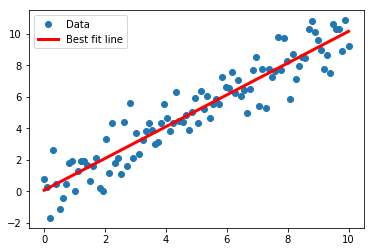

In [12]:
# 绘制结果
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()